# 信用评分数据（新手友好） 

# 导入数据
数据的一些属性如下：
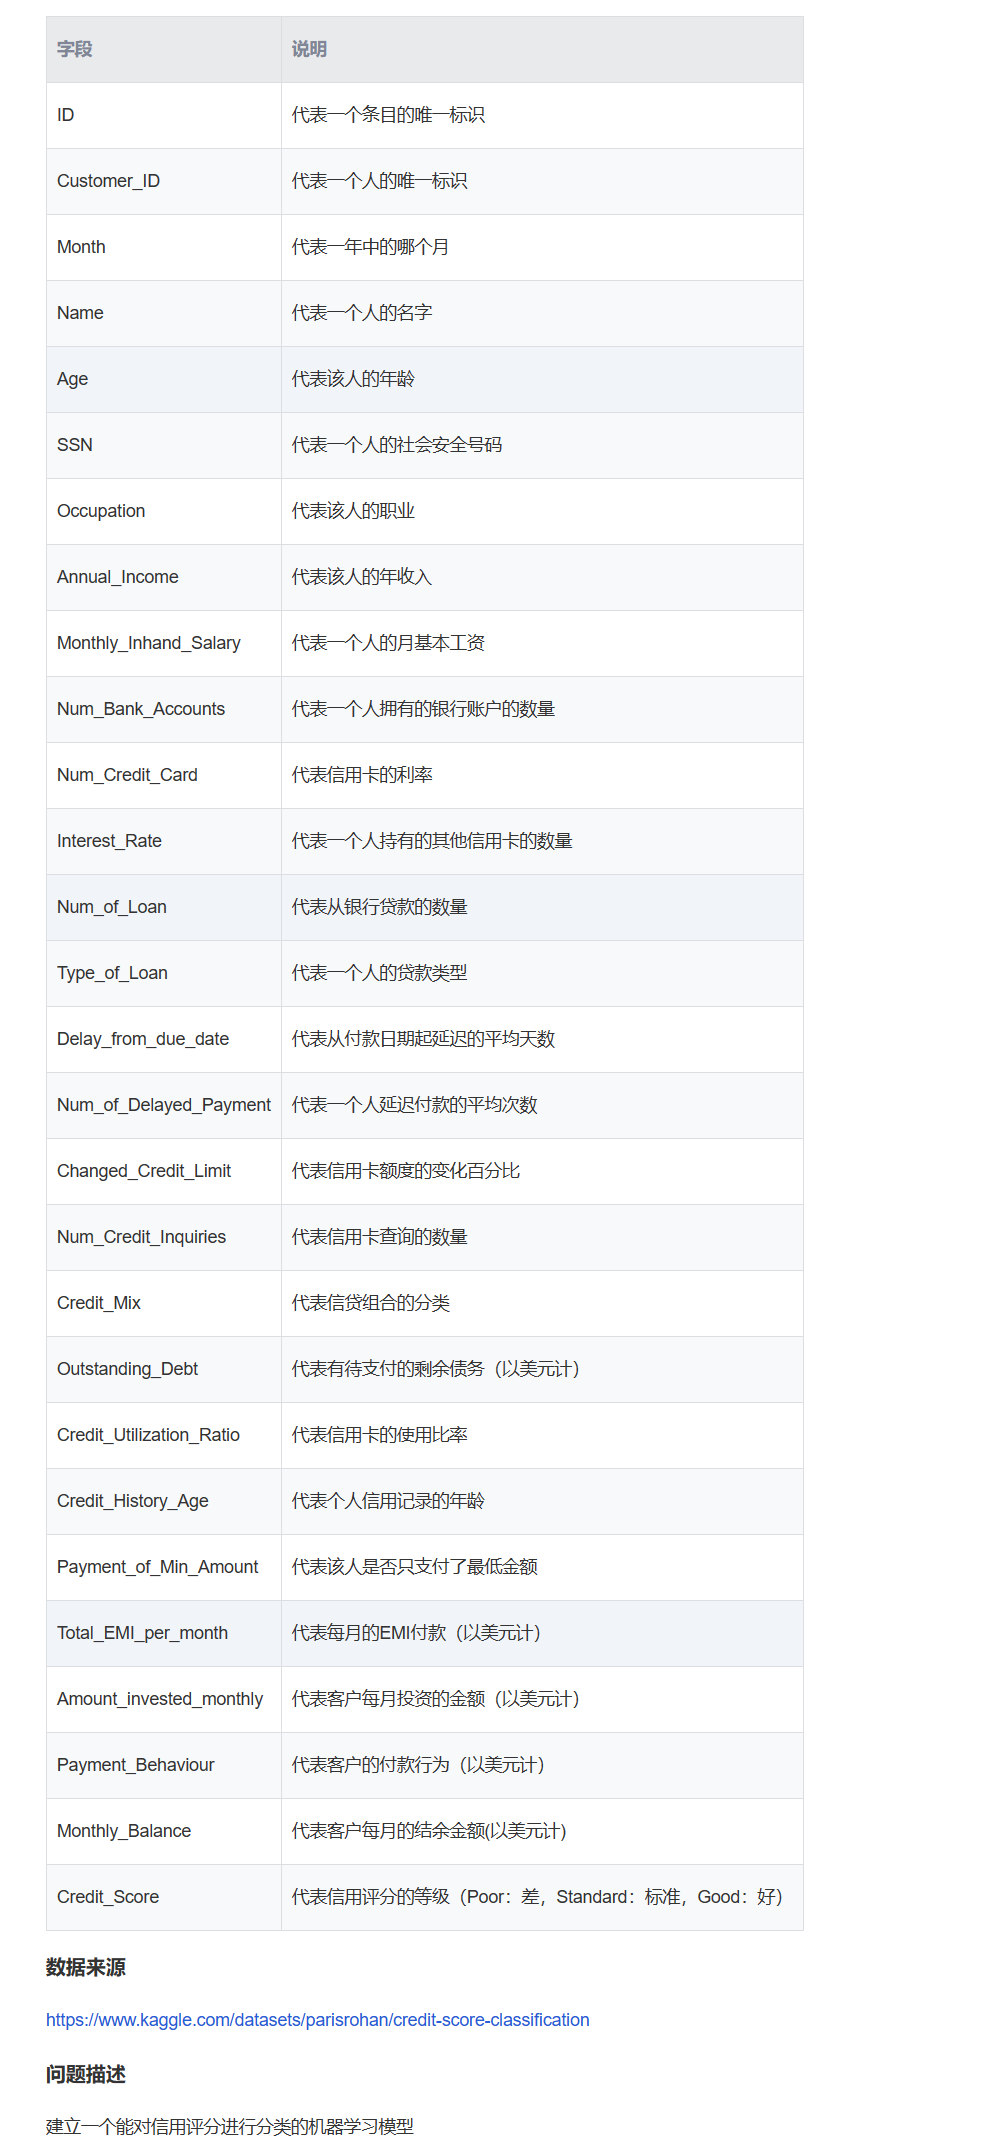

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

full_X = pd.read_csv('/kaggle/input/credit-score-classification/train.csv', low_memory=False)
test_X = pd.read_csv('/kaggle/input/credit-score-classification/test.csv', low_memory=False)
Y = full_X['Credit_Score']

# EDA

## 缺失值查看

train数据集

<Axes: >

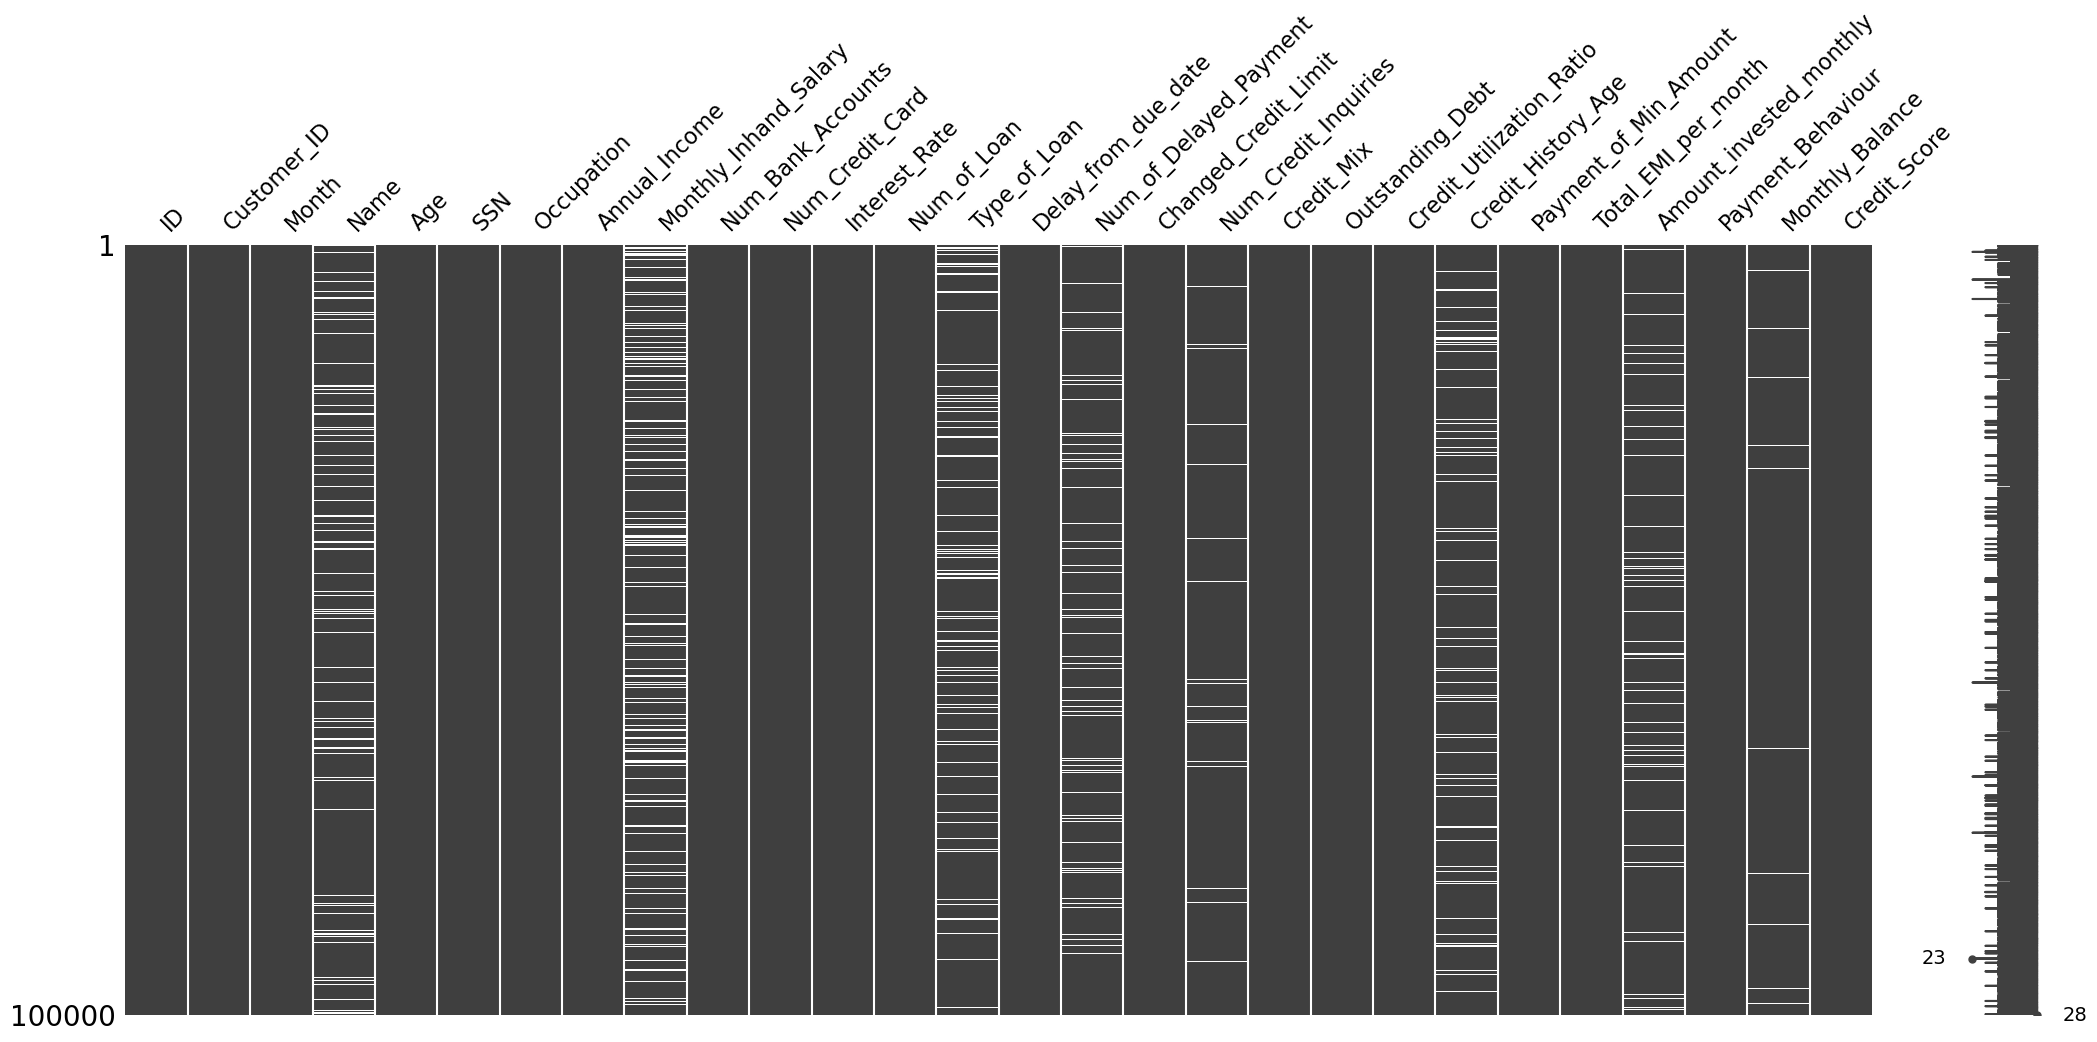

In [2]:
import missingno as msg

msg.matrix(full_X)

test数据集

<Axes: >

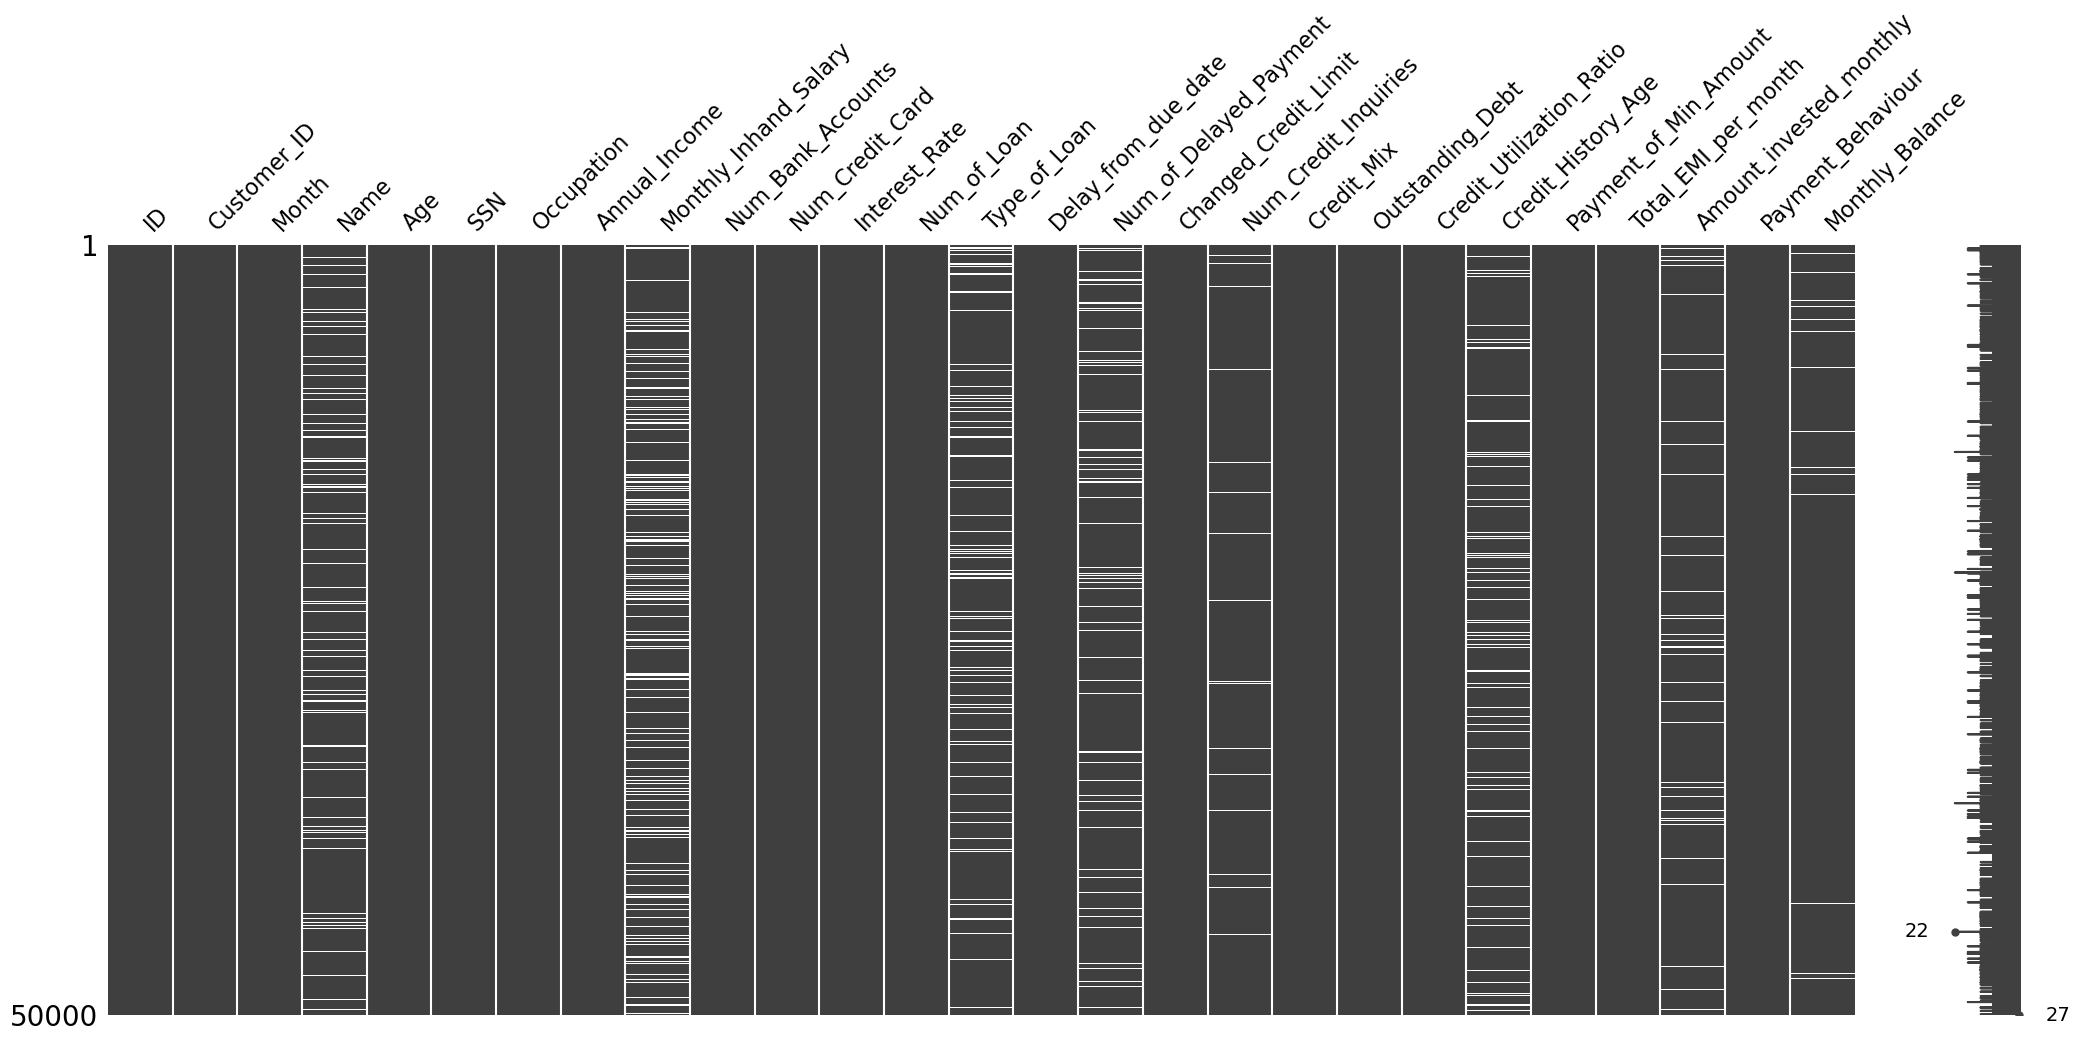

In [3]:
msg.matrix(test_X)

## 每一列的数据类型

In [4]:
full_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

### 选出我们需要的属性列

因为我们需要的属性列非常多，但是我们的不需要的属性列却很少。

我们先找出来训练集和测试集中公共的属性列

In [5]:
union_features = list(set(full_X.columns) & (set(test_X)))
union_features

['Changed_Credit_Limit',
 'ID',
 'Age',
 'Num_Credit_Card',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Delay_from_due_date',
 'Monthly_Inhand_Salary',
 'Amount_invested_monthly',
 'Month',
 'Customer_ID',
 'Num_Bank_Accounts',
 'Outstanding_Debt',
 'Annual_Income',
 'Occupation',
 'Interest_Rate',
 'Monthly_Balance',
 'Num_of_Delayed_Payment',
 'SSN',
 'Payment_of_Min_Amount',
 'Type_of_Loan',
 'Payment_Behaviour',
 'Credit_Mix',
 'Credit_History_Age',
 'Num_of_Loan',
 'Num_Credit_Inquiries',
 'Name']

In [6]:
unimportant_features = ['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary',
                           'Type_of_Loan','Num_of_Delayed_Payment','Credit_History_Age','Amount_invested_monthly']
features = list(set(union_features) - set(unimportant_features))
features.sort()
features

['Age',
 'Annual_Income',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Credit_Utilization_Ratio',
 'Delay_from_due_date',
 'Interest_Rate',
 'Monthly_Balance',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Num_Credit_Inquiries',
 'Num_of_Loan',
 'Occupation',
 'Outstanding_Debt',
 'Payment_Behaviour',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month']

In [7]:
X = full_X[features]
test_X_feature = test_X[features]
X.head()
test_X_feature.head()

,Age,Annual_Income,Changed_Credit_Limit,Credit_Mix,Credit_Utilization_Ratio,Delay_from_due_date,Interest_Rate,Monthly_Balance,Num_Bank_Accounts,Num_Credit_Card,Num_Credit_Inquiries,Num_of_Loan,Occupation,Outstanding_Debt,Payment_Behaviour,Payment_of_Min_Amount,Total_EMI_per_month
0,23,19114.12,11.27,Good,35.030402,3,3,186.26670208571772,3,4,2022.0,4,Scientist,809.98,Low_spent_Small_value_payments,No,49.574949
1,24,19114.12,13.27,Good,33.053114,3,3,361.44400385378196,3,4,4.0,4,Scientist,809.98,High_spent_Medium_value_payments,No,49.574949
2,24,19114.12,12.27,Good,33.811894,-1,3,264.67544623342997,3,4,4.0,4,Scientist,809.98,Low_spent_Medium_value_payments,No,49.574949
3,24_,19114.12,11.27,Good,32.430559,4,3,343.82687322383634,3,4,4.0,4,Scientist,809.98,High_spent_Medium_value_payments,No,49.574949
4,28,34847.84,5.42,Good,25.926822,3,6,485.2984336755923,2,4,5.0,1,_______,605.03,High_spent_Large_value_payments,No,18.816215


<Axes: >

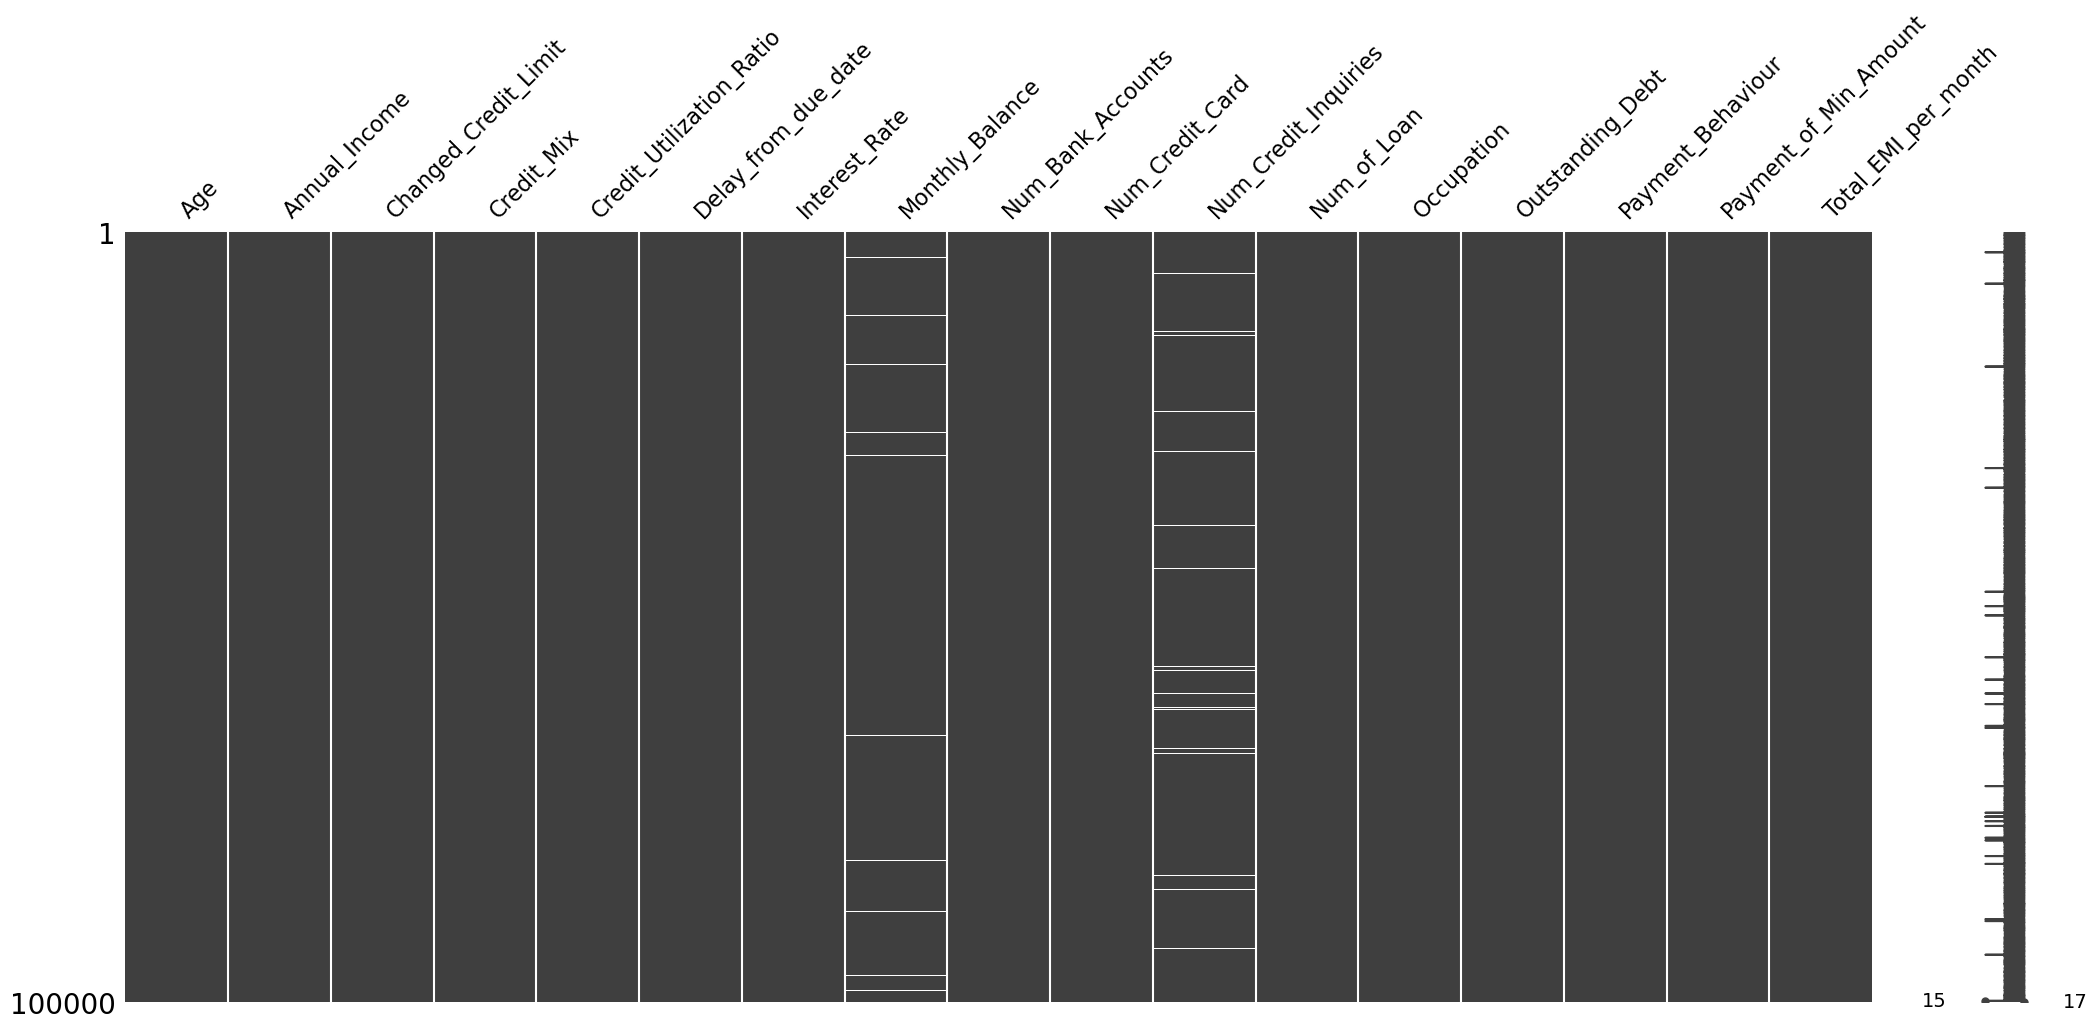

In [8]:
msg.matrix(X)

<Axes: >

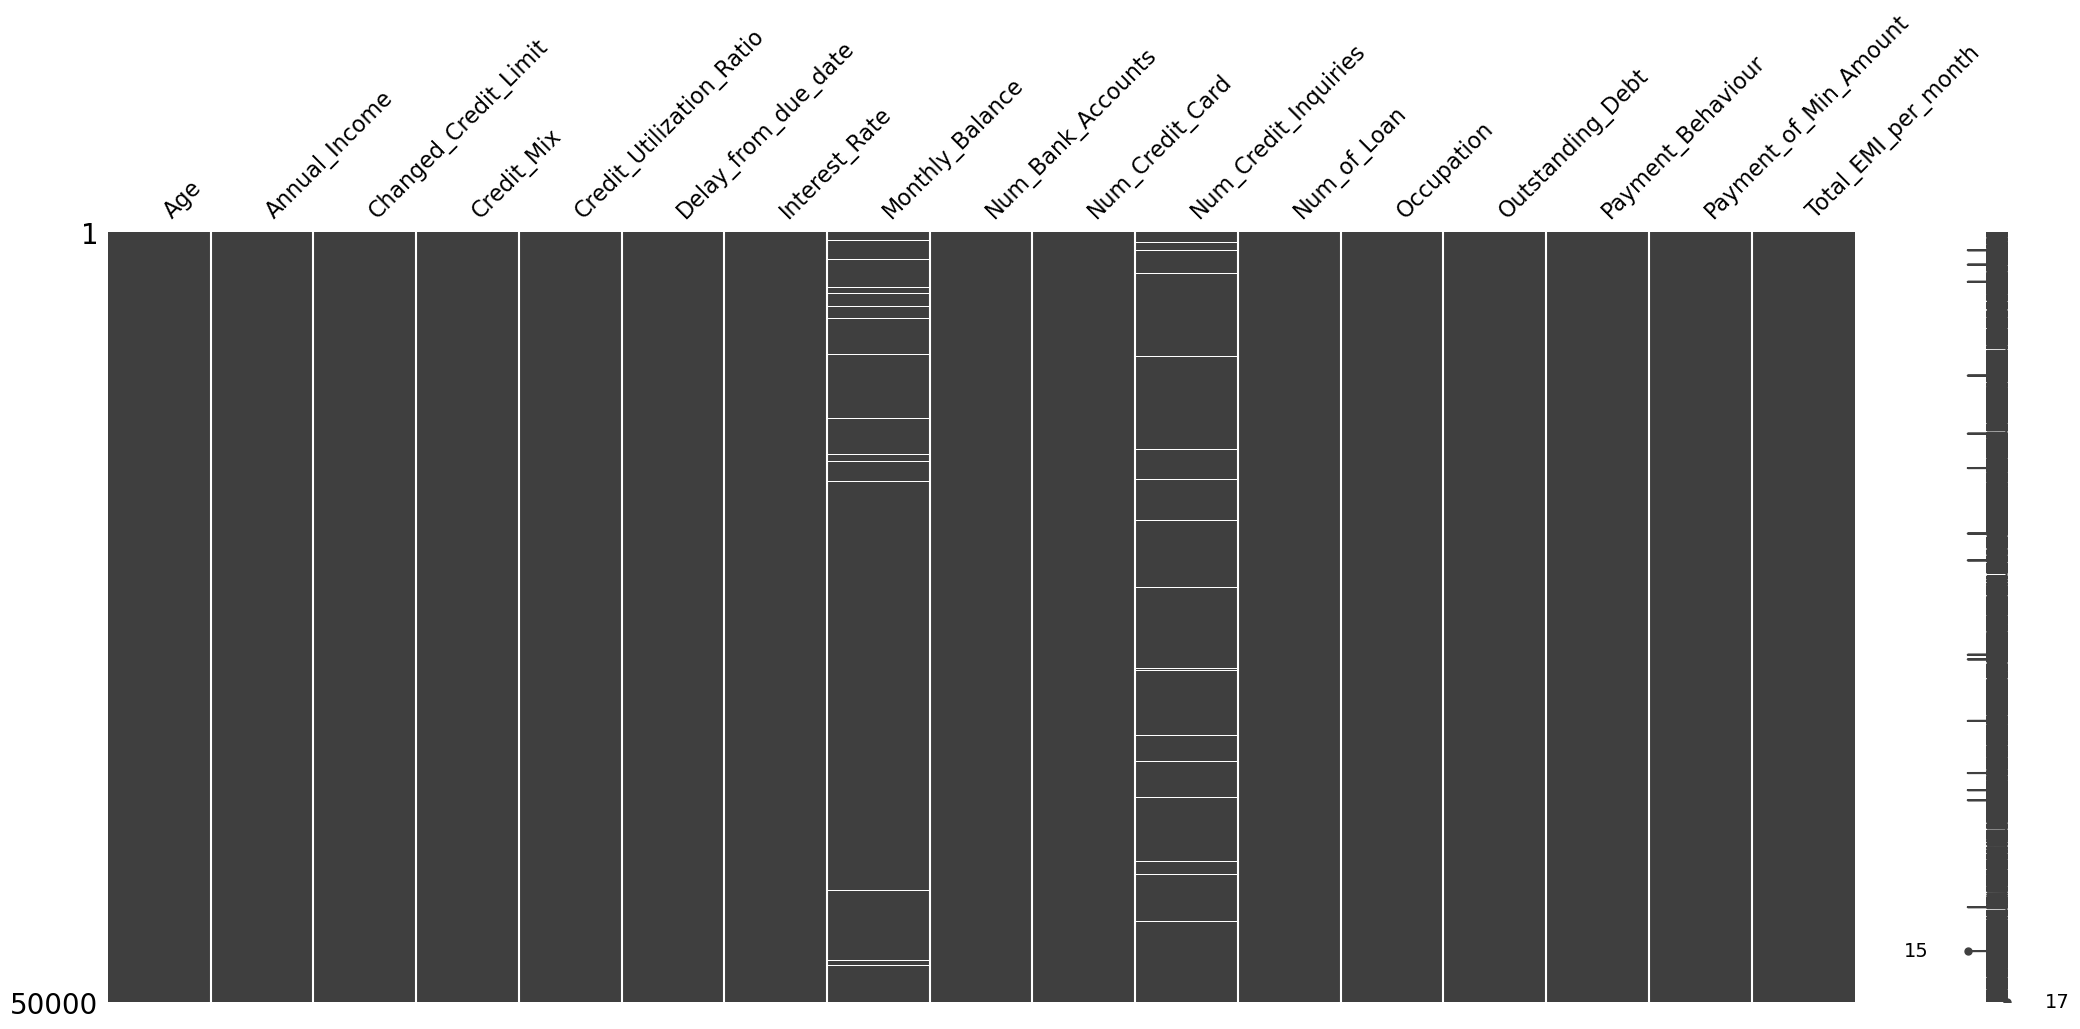

In [9]:
msg.matrix(test_X_feature)

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Annual_Income             100000 non-null  object 
 2   Changed_Credit_Limit      100000 non-null  object 
 3   Credit_Mix                100000 non-null  object 
 4   Credit_Utilization_Ratio  100000 non-null  float64
 5   Delay_from_due_date       100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Monthly_Balance           98800 non-null   object 
 8   Num_Bank_Accounts         100000 non-null  int64  
 9   Num_Credit_Card           100000 non-null  int64  
 10  Num_Credit_Inquiries      98035 non-null   float64
 11  Num_of_Loan               100000 non-null  object 
 12  Occupation                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  ob

从这个上面我们可以看得，我们有超级多的**非数值列**

结合我们的图，我们可以发现`Num_Credit_Inquiries`和`Monthly_Balance`中存在缺失值。

这个时候我们的数据预处理就需要很好的起作用了

让我没有想到的是，居然年龄也是一个非数值列

# 特征工程

## 将本是数值列，但实际为object列改回来

我们先将本应该是`数值列`，但实际上是`object`的属性转换成为**数值列**

> Age

> Annual_Income

> Changed_Credit_Limit

> Monthly_Balance

> Num_of_Loan

> Outstanding_Debt

### Age处理

In [11]:
Age = X['Age'].str.replace('_', '')
Age = pd.Series(Age).apply(lambda x: eval(x) if 100 >= eval(x) > 0 else -1)
X['Age'] = Age

Age = test_X_feature['Age'].str.replace('_', '')
Age = pd.Series(Age).apply(lambda x: eval(x) if 100 >= eval(x) > 0 else -1)
test_X_feature['Age'] = Age

### Annual_Income

In [12]:
Annual_Income = X['Annual_Income'].str.replace('_', '')
Annual_Income = pd.Series(Annual_Income).apply(lambda x: eval(x))
X['Annual_Income'] = Annual_Income

Annual_Income = test_X_feature['Annual_Income'].str.replace('_', '')
Annual_Income = pd.Series(Annual_Income).apply(lambda x: eval(x))
test_X_feature['Annual_Income'] = Annual_Income


### Changed_Credit_Limit

In [13]:
Changed_Credit_Limit = X['Changed_Credit_Limit'].str.replace('_', '')
Changed_Credit_Limit = pd.Series(Changed_Credit_Limit).apply(lambda x: eval(x) if len(x) > 1 else -1)
X['Changed_Credit_Limit'] = Changed_Credit_Limit

Changed_Credit_Limit = test_X_feature['Changed_Credit_Limit'].str.replace('_', '')
Changed_Credit_Limit = pd.Series(Changed_Credit_Limit).apply(lambda x: eval(x) if len(x) > 1 else -1)
test_X_feature['Changed_Credit_Limit'] = Changed_Credit_Limit

### Monthly_Balance

这里我们先去除多余的下划线，然后用0填充空值，最后转为数值列。

In [14]:
X['Monthly_Balance'].fillna(np.nan, inplace=True)
test_X_feature['Monthly_Balance'].fillna(np.nan, inplace=True)
X['Monthly_Balance'] = X['Monthly_Balance'].str.replace('_', '')
test_X_feature['Monthly_Balance'] = test_X_feature['Monthly_Balance'].str.replace('_', '')
X['Monthly_Balance'].astype(float)
test_X_feature['Monthly_Balance'].astype(float)
X['Monthly_Balance'].fillna(0.0, inplace=True)
test_X_feature['Monthly_Balance'].fillna(0.0, inplace=True)
X['Monthly_Balance'] = pd.to_numeric(X['Monthly_Balance'], errors='coerce')
test_X_feature['Monthly_Balance'] = pd.to_numeric(test_X_feature['Monthly_Balance'], errors='coerce')

### Num_of_Loan

In [15]:
X['Num_of_Loan'] = X['Num_of_Loan'].str.replace('_', '')
test_X_feature['Num_of_Loan'] = test_X_feature['Num_of_Loan'].str.replace('_', '')

X['Num_of_Loan'] = pd.to_numeric(X['Num_of_Loan'], errors='coerce')
test_X_feature['Num_of_Loan'] = pd.to_numeric(test_X_feature['Num_of_Loan'], errors='coerce')

### Outstanding_Debt

In [16]:
X['Outstanding_Debt'] = X['Outstanding_Debt'].str.replace('_', '')
test_X_feature['Outstanding_Debt'] = test_X_feature['Outstanding_Debt'].str.replace('_', '')

X['Outstanding_Debt'] = pd.to_numeric(X['Outstanding_Debt'], errors='coerce')
test_X_feature['Outstanding_Debt'] = pd.to_numeric(test_X_feature['Outstanding_Debt'], errors='coerce')

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   Annual_Income             100000 non-null  float64
 2   Changed_Credit_Limit      100000 non-null  float64
 3   Credit_Mix                100000 non-null  object 
 4   Credit_Utilization_Ratio  100000 non-null  float64
 5   Delay_from_due_date       100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Monthly_Balance           100000 non-null  float64
 8   Num_Bank_Accounts         100000 non-null  int64  
 9   Num_Credit_Card           100000 non-null  int64  
 10  Num_Credit_Inquiries      98035 non-null   float64
 11  Num_of_Loan               100000 non-null  int64  
 12  Occupation                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  fl

## 本身是非数值列的编码

针对**非数值列**，我们通常采用的是标签编码。
我们需要处理的对象包括以下：

> Credit_Mix

> Occupation

> Payment_Behaviour

> Payment_of_Min_Amount

但是考虑到属性很多，我们的要是采用One-Hot编码，将会扩充很多数据列，针对数据量小的我们可以这样采用。但是这里数据列非常的多。这里我建议使用`ordinalEncoder`。同样，`sklearn`中含有对应的库函数。

### Credit_Mix

这里对于’_‘这个变量，我们可以选择替换，也可以不替换，这里我感觉都有价值。

In [18]:
X['Credit_Mix'].unique(), test_X_feature['Credit_Mix'].unique()

(array(['_', 'Good', 'Standard', 'Bad'], dtype=object),
 array(['Good', '_', 'Standard', 'Bad'], dtype=object))

### Occupation

从下面我们可以看到，基本上没有什么区别，还是针对`____`变量，我们可以不做处理，就是表示其他职业

In [19]:
X['Occupation'].unique(), test_X_feature['Occupation'].unique()

(array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
        'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
        'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
        'Architect'], dtype=object),
 array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
        'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
        'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
        'Architect'], dtype=object))

### Payment_Behaviour

同上

In [20]:
X['Payment_Behaviour'].unique(), test_X_feature['Payment_Behaviour'].unique()

(array(['High_spent_Small_value_payments',
        'Low_spent_Large_value_payments',
        'Low_spent_Medium_value_payments',
        'Low_spent_Small_value_payments',
        'High_spent_Medium_value_payments', '!@9#%8',
        'High_spent_Large_value_payments'], dtype=object),
 array(['Low_spent_Small_value_payments',
        'High_spent_Medium_value_payments',
        'Low_spent_Medium_value_payments',
        'High_spent_Large_value_payments',
        'Low_spent_Large_value_payments', '!@9#%8',
        'High_spent_Small_value_payments'], dtype=object))

### Payment_of_Min_Amount

In [21]:
X['Payment_of_Min_Amount'].unique(), test_X_feature['Payment_of_Min_Amount'].unique()

(array(['No', 'NM', 'Yes'], dtype=object),
 array(['No', 'Yes', 'NM'], dtype=object))

## OrdinalEncoding编码

In [22]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(dtype=np.int)

cat_feature = ['Credit_Mix', 'Occupation', 'Payment_Behaviour', 'Payment_of_Min_Amount']

X[cat_feature] = ordinal_encoder.fit_transform(X[cat_feature])
test_X_feature[cat_feature] = ordinal_encoder.transform(test_X_feature[cat_feature])

In [23]:
ordinal_encoder.categories_

[array(['Bad', 'Good', 'Standard', '_'], dtype=object),
 array(['Accountant', 'Architect', 'Developer', 'Doctor', 'Engineer',
        'Entrepreneur', 'Journalist', 'Lawyer', 'Manager', 'Mechanic',
        'Media_Manager', 'Musician', 'Scientist', 'Teacher', 'Writer',
        '_______'], dtype=object),
 array(['!@9#%8', 'High_spent_Large_value_payments',
        'High_spent_Medium_value_payments',
        'High_spent_Small_value_payments',
        'Low_spent_Large_value_payments',
        'Low_spent_Medium_value_payments',
        'Low_spent_Small_value_payments'], dtype=object),
 array(['NM', 'No', 'Yes'], dtype=object)]

<Axes: >

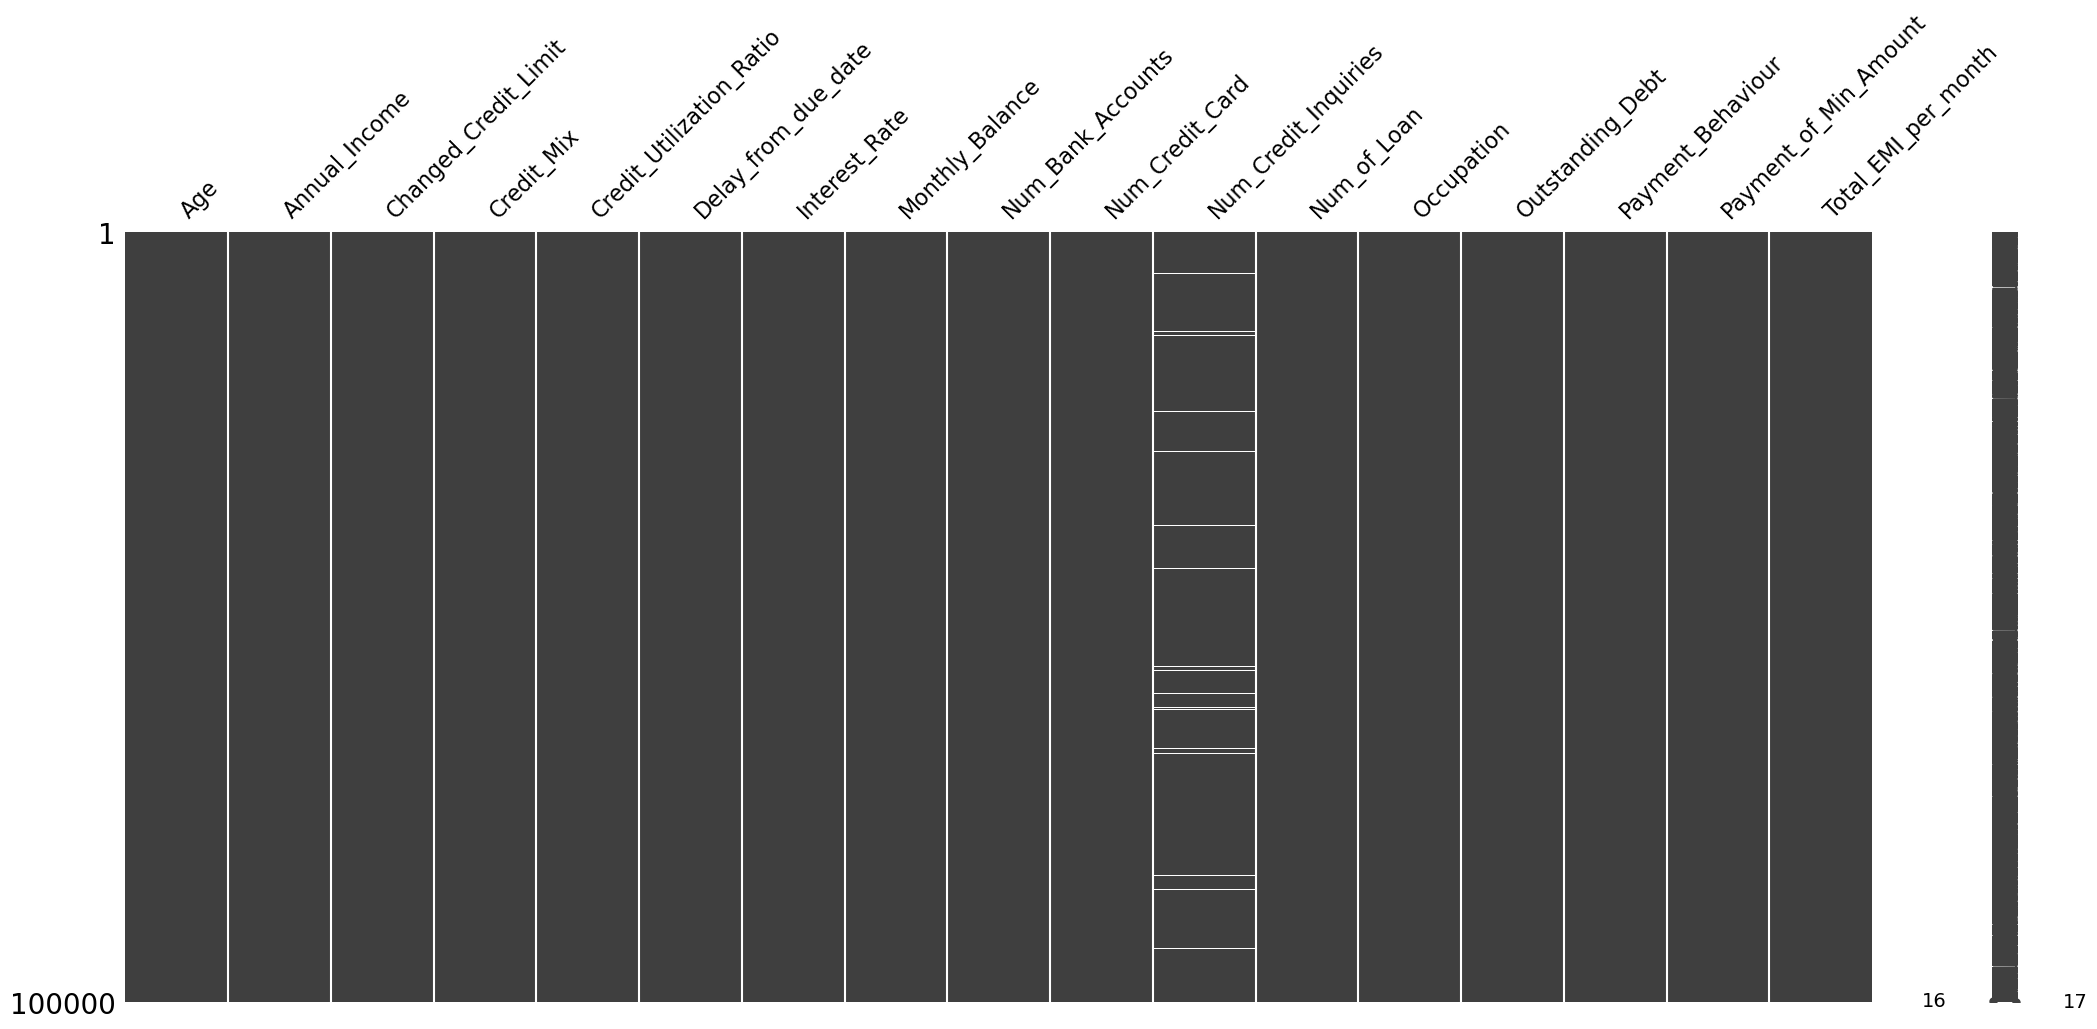

In [24]:
msg.matrix(X)

## 缺失值填充

这里主要是针对`Num_Credit_Inquiries`。

首先查看一下当前所有列的数据类型，我们可以发现目前都全部变成数值型

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   Annual_Income             100000 non-null  float64
 2   Changed_Credit_Limit      100000 non-null  float64
 3   Credit_Mix                100000 non-null  int64  
 4   Credit_Utilization_Ratio  100000 non-null  float64
 5   Delay_from_due_date       100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Monthly_Balance           100000 non-null  float64
 8   Num_Bank_Accounts         100000 non-null  int64  
 9   Num_Credit_Card           100000 non-null  int64  
 10  Num_Credit_Inquiries      98035 non-null   float64
 11  Num_of_Loan               100000 non-null  int64  
 12  Occupation                100000 non-null  int64  
 13  Outstanding_Debt          100000 non-null  fl

In [26]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer() # 这里采用默认的均值填充

X_columns = X.columns
test_X_columns = test_X_feature.columns

X = pd.DataFrame(simple_imputer.fit_transform(X))
test_X_feature = pd.DataFrame(simple_imputer.transform(test_X_feature))

X.columns = X_columns
test_X_feature.columns = test_X_columns

In [27]:
X.isna().any(), test_X_feature.isna().any()

(Age                         False
 Annual_Income               False
 Changed_Credit_Limit        False
 Credit_Mix                  False
 Credit_Utilization_Ratio    False
 Delay_from_due_date         False
 Interest_Rate               False
 Monthly_Balance             False
 Num_Bank_Accounts           False
 Num_Credit_Card             False
 Num_Credit_Inquiries        False
 Num_of_Loan                 False
 Occupation                  False
 Outstanding_Debt            False
 Payment_Behaviour           False
 Payment_of_Min_Amount       False
 Total_EMI_per_month         False
 dtype: bool,
 Age                         False
 Annual_Income               False
 Changed_Credit_Limit        False
 Credit_Mix                  False
 Credit_Utilization_Ratio    False
 Delay_from_due_date         False
 Interest_Rate               False
 Monthly_Balance             False
 Num_Bank_Accounts           False
 Num_Credit_Card             False
 Num_Credit_Inquiries        False
 Num_o

### 处理一下标签

In [28]:
def encode(x):
    if x == 'Poor':
        return 0
    elif x == 'Standard':
        return 1
    elif x == 'Good':
        return 2

Y = Y.apply(encode)
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: Credit_Score, dtype: int64

In [29]:
# import matplotlib.pyplot as plt
# Y.plot.pie(y='类别', autopct='%.1f%%', legend=False, figsize=(6, 6))

到这里，我们的所有数据预处理基本上就完成了

# 划分训练集和验证集

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=2004)

In [31]:
X_train.shape[0] == y_train.shape[0], X_val.shape[0] == y_val.shape[0]

(True, True)

从上面我们看到，划分的基本没有啥毛病


# 模型选择

这里我们采取决策树分类和随机森林分类

我们的评价指标统一使用`f1_score`(f1_score越高越好)



In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

model1 = DecisionTreeClassifier()

model1.fit(X_train, y_train)

f1_score(y_val, model1.predict(X_val), average='weighted')

0.6972749516379496

In [33]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

f1_score(y_val, model2.predict(X_val), average='weighted')

0.7822075146093597

通过对比这两个模型，我们可以发现在默认的超参数情况下，`RandomForestClassifier`效果更加好。后续预测我们采用随机森林来预测

# 预测

预测之前，

In [34]:
model = RandomForestClassifier()
model.fit(X, Y)

RandomForestClassifier()

In [35]:
predict = model.predict(test_X_feature)

In [36]:
predict

array([2, 2, 2, ..., 1, 0, 1])

其中0表示Poor， 1表示Standard， 2表示Good

In [37]:
ans = pd.DataFrame({'ID': test_X['ID'],
      'Credict_Score': predict})
ans.head()

,ID,Credict_Score
0,0x160a,2
1,0x160b,2
2,0x160c,2
3,0x160d,2
4,0x1616,2


In [38]:
def decode(x):
    if x == 0:
        return 'Poor'
    elif x == 1:
        return 'Standard'
    elif x == 2:
        return 'Good'
ans['Credict_Score'] = ans['Credict_Score'].apply(decode)

In [39]:
ans.to_csv('submission.csv', index=False)